# Task1

## Libraries

In [25]:
import pandas as pd
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [26]:
credits = pd.read_csv('../data/credits.csv')
keywords = pd.read_csv('../data/keywords.csv')
links_small = pd.read_csv('../data/links_small.csv')
links = pd.read_csv('../data/links.csv')
movies_metadata = pd.read_csv('../data/movies_metadata.csv')
ratings_small = pd.read_csv('../data/ratings_small.csv')
ratings = pd.read_csv('../data/ratings.csv')

/var/folders/vs/t6hclhb524l53jbbc2n222640000gn/T/ipykernel_55839/2131900611.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('../data/movies_metadata.csv')


In [27]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [28]:
# Merge all of them to decrease confusion
credits  = credits.merge(keywords, on = 'id')
links  = links.merge(ratings_small, on = 'movieId')
links.rename(columns = {'tmdbId':'id'}, inplace = True) #Links and credits have same column id and tmdbid
links  = credits.merge(links, on = 'id')

In [29]:
movies_metadata = movies_metadata.drop([29503,35587,19730]) # as the data in those points arent clear and those indices are removed

movies_metadata['id'] = movies_metadata['id'].astype('int64') #id is an object we need to convert into int

movies_metadata = movies_metadata.merge(links,on='id')

In [30]:
# Dropping Duplicates
print(movies_metadata.duplicated().sum())
df = movies_metadata.drop_duplicates()

# Dropping unnecessary columns and rearranging them for readability
df = df[['id','title','genres','overview','rating','spoken_languages','cast','crew','vote_average','vote_count','popularity','budget','keywords','production_companies','revenue','runtime','poster_path']]
df.columns

244


Index(['id', 'title', 'genres', 'overview', 'rating', 'spoken_languages',
       'cast', 'crew', 'vote_average', 'vote_count', 'popularity', 'budget',
       'keywords', 'production_companies', 'revenue', 'runtime',
       'poster_path'],
      dtype='object')

## Data Cleaning

In [31]:
df.shape

(99878, 17)

In [32]:
df.duplicated().sum()

np.int64(71255)

In [33]:
df = df.drop_duplicates()

df.shape

(28623, 17)

In [34]:
df.isnull().sum()

id                       0
title                    0
genres                   0
overview                13
rating                   0
spoken_languages         0
cast                     0
crew                     0
vote_average             0
vote_count               0
popularity               0
budget                   0
keywords                 0
production_companies     0
revenue                  0
runtime                  0
poster_path              6
dtype: int64

In [35]:
df.dropna(inplace=True)

We have id name for each genre in our dataset as we are most interested in the name of genre not on its id, we only keep its name by removing the extra unnecessary information

Genre / Keywords / Cast / Crew / SpokenLanguage

In [36]:
def genre_convert(data):
    genre = []
    for i in ast.literal_eval(data):
        genre.append(i['name'])
    return genre 
df['genres'] = df['genres'].apply(genre_convert)

def name_convert(data):
    keywords = []
    for i in ast.literal_eval(data):
        keywords.append(i['name'])
    return keywords 
df['keywords'] = df['keywords'].apply(name_convert)

def cast_names(data):
    actors = []
    counter = 0
    for i in ast.literal_eval(data):
        if counter != 3:
            actors.append(i['name'])
            counter += 1
    return actors 
df['cast'] = df['cast'].apply(cast_names)


def crew_names(data):
    director = []
    for i in ast.literal_eval(data):
        if i['job'] == "Director":
            director.append(i['name'])
            break
    return director
df['crew'] = df['crew'].apply(crew_names)

def spoken_lang(data):
    keywords = []
    for i in ast.literal_eval(data):
        keywords.append(i['name'])
    return keywords
df['spoken_languages'] = df['spoken_languages'].apply(spoken_lang)

def production_companies(data):
    production_companies = []
    for i in ast.literal_eval(data):
        production_companies.append(i['name'])
    return production_companies 
df['production_companies'] = df['production_companies'].apply(production_companies)

df['genres'] = df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
df['cast'] = df['cast'].apply(lambda x:[i.replace(" ","") for i in x])
df['crew'] = df['crew'].apply(lambda x:[i.replace(" ","") for i in x])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
df['genres'] = df['genres'].apply(lambda x:" ".join(x))
df['cast'] = df['cast'].apply(lambda x:" ".join(x))
df['crew'] = df['crew'].apply(lambda x:" ".join(x))
df['keywords'] = df['keywords'].apply(lambda x:" ".join(x))
df['spoken_languages'] = df['spoken_languages'].apply(lambda x:" ".join(x))
df['production_companies'] = df['production_companies'].apply(lambda x:" ".join(x))

In [37]:
df.head

<bound method NDFrame.head of             id                                              title  \
0          862                                          Toy Story   
1          862                                          Toy Story   
2          862                                          Toy Story   
3          862                                          Toy Story   
5          862                                          Toy Story   
...        ...                                                ...   
100104  402672                                       Mohenjo Daro   
100105  391698  The Beatles: Eight Days a Week - The Touring Y...   
100106   10991                      Pokémon: Spell of the Unknown   
100110   12600        Pokémon 4Ever: Celebi - Voice of the Forest   
100114  265189                                      Force Majeure   

                                                   genres  \
0                                 Animation Comedy Family   
1                  

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28604 entries, 0 to 100114
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28604 non-null  int64  
 1   title                 28604 non-null  object 
 2   genres                28604 non-null  object 
 3   overview              28604 non-null  object 
 4   rating                28604 non-null  float64
 5   spoken_languages      28604 non-null  object 
 6   cast                  28604 non-null  object 
 7   crew                  28604 non-null  object 
 8   vote_average          28604 non-null  float64
 9   vote_count            28604 non-null  float64
 10  popularity            28604 non-null  object 
 11  budget                28604 non-null  object 
 12  keywords              28604 non-null  object 
 13  production_companies  28604 non-null  object 
 14  revenue               28604 non-null  float64
 15  runtime               2

In [39]:
df = (
    df.groupby("id", as_index=False)
      .agg({
          "rating": "mean",
          **{col: "first" for col in df.columns if col not in ["id", "rating"]}
      })
)
df

,id,rating,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,poster_path
0,2,4.500000,Ariel,Drama Crime,Taisto Kasurinen is a Finnish coal miner whose...,suomi Deutsch,TuroPajala SusannaHaavisto MattiPellonpää,AkiKaurismäki,7.1,44.0,3.860491,0,underdog prison factoryworker prisoner helsink...,Villealfa Filmproduction Oy Finnish Film Found...,0.0,69.0,/gZCJZOn4l0Zj5hAxsMbxoS6CL0u.jpg
1,5,2.812500,Four Rooms,Crime Comedy,It's Ted the Bellhop's first night on the job....,English,TimRoth AntonioBanderas JenniferBeals,AllisonAnders,6.5,539.0,9.026586,4000000,hotel newyear'seve witch bet hotelroom sperm l...,Miramax Films A Band Apart,4300000.0,98.0,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg
2,6,3.000000,Judgment Night,Action Thriller Crime,"While racing to a boxing match, Frank, Mike, J...",English,EmilioEstevez CubaGoodingJr. DenisLeary,StephenHopkins,6.4,79.0,5.538671,0,chicago drugdealer boxingmatch escape onenight,Universal Pictures Largo Entertainment JVC Ent...,12136938.0,110.0,/lNXmgUrP6h1nD53gkFh4WDzT6RZ.jpg
3,11,2.750000,Star Wars,Adventure Action ScienceFiction,Princess Leia is captured and held hostage by ...,English,MarkHamill HarrisonFord CarrieFisher,GeorgeLucas,8.1,6778.0,42.149697,11000000,android galaxy hermit deathstar lightsaber jed...,Lucasfilm Twentieth Century Fox Film Corporation,775398007.0,121.0,/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg
4,12,2.833333,Finding Nemo,Animation Family,"Nemo, an adventurous young clownfish, is unexp...",English,AlbertBrooks EllenDeGeneres AlexanderGould,AndrewStanton,7.6,6292.0,25.497794,94000000,fathersonrelationship harbor underwater fishta...,Pixar Animation Studios,940335536.0,100.0,/syPWyeeqzTQIxjIUaIFI7d0TyEY.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,392572,5.000000,Rustom,Thriller Romance,"Rustom Pavri, an honourable officer of the Ind...",हिन्दी,AkshayKumar IleanaD'Cruz EshaGupta,TinuSureshDesai,7.3,25.0,7.333139,1000000,bollywood,KriArj Entertainment,0.0,150.0,/q1lrN6ZrIsOs077lQB86aPGKZRF.jpg
9006,399106,4.000000,Piper,Family Animation,A mother bird tries to teach her little one ho...,English,,AlanBarillaro,8.2,487.0,11.243161,0,bird fear short,Pixar Animation Studios Disney,0.0,6.0,/jLRllZsubY8UWpeMyDLVXdRyEWi.jpg
9007,401387,0.500000,Sunspring,ScienceFiction,Sunspring is a short film about three people l...,English,ThomasMiddleditch HumphreyKer ElisabethGray,OscarSharp,6.6,7.0,1.124787,0,experimentalfilm nonsense,End Cue,0.0,9.0,/sKBTE5ukRfnhHJuK1yJYCBNLlny.jpg
9008,402672,3.000000,Mohenjo Daro,Adventure Drama History Romance,"Village lad Sarman is drawn to big, bad Mohenj...",हिन्दी,HrithikRoshan PoojaHegde KabirBedi,AshutoshGowariker,6.7,26.0,1.423358,15050000,bollywood,UTV Motion Pictures Ashutosh Gowariker Product...,16180000.0,155.0,/q2XVemXiWSa18mbaVpI3rbLXG2u.jpg


In [40]:
df.to_csv('../data/movies.csv',index=False)

In [41]:
df = pd.read_csv("../data/movies.csv")

df

,id,rating,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,poster_path
0,2,4.500000,Ariel,Drama Crime,Taisto Kasurinen is a Finnish coal miner whose...,suomi Deutsch,TuroPajala SusannaHaavisto MattiPellonpää,AkiKaurismäki,7.1,44.0,3.860491,0,underdog prison factoryworker prisoner helsink...,Villealfa Filmproduction Oy Finnish Film Found...,0.0,69.0,/gZCJZOn4l0Zj5hAxsMbxoS6CL0u.jpg
1,5,2.812500,Four Rooms,Crime Comedy,It's Ted the Bellhop's first night on the job....,English,TimRoth AntonioBanderas JenniferBeals,AllisonAnders,6.5,539.0,9.026586,4000000,hotel newyear'seve witch bet hotelroom sperm l...,Miramax Films A Band Apart,4300000.0,98.0,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg
2,6,3.000000,Judgment Night,Action Thriller Crime,"While racing to a boxing match, Frank, Mike, J...",English,EmilioEstevez CubaGoodingJr. DenisLeary,StephenHopkins,6.4,79.0,5.538671,0,chicago drugdealer boxingmatch escape onenight,Universal Pictures Largo Entertainment JVC Ent...,12136938.0,110.0,/lNXmgUrP6h1nD53gkFh4WDzT6RZ.jpg
3,11,2.750000,Star Wars,Adventure Action ScienceFiction,Princess Leia is captured and held hostage by ...,English,MarkHamill HarrisonFord CarrieFisher,GeorgeLucas,8.1,6778.0,42.149697,11000000,android galaxy hermit deathstar lightsaber jed...,Lucasfilm Twentieth Century Fox Film Corporation,775398007.0,121.0,/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg
4,12,2.833333,Finding Nemo,Animation Family,"Nemo, an adventurous young clownfish, is unexp...",English,AlbertBrooks EllenDeGeneres AlexanderGould,AndrewStanton,7.6,6292.0,25.497794,94000000,fathersonrelationship harbor underwater fishta...,Pixar Animation Studios,940335536.0,100.0,/syPWyeeqzTQIxjIUaIFI7d0TyEY.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,392572,5.000000,Rustom,Thriller Romance,"Rustom Pavri, an honourable officer of the Ind...",हिन्दी,AkshayKumar IleanaD'Cruz EshaGupta,TinuSureshDesai,7.3,25.0,7.333139,1000000,bollywood,KriArj Entertainment,0.0,150.0,/q1lrN6ZrIsOs077lQB86aPGKZRF.jpg
9006,399106,4.000000,Piper,Family Animation,A mother bird tries to teach her little one ho...,English,NaN,AlanBarillaro,8.2,487.0,11.243161,0,bird fear short,Pixar Animation Studios Disney,0.0,6.0,/jLRllZsubY8UWpeMyDLVXdRyEWi.jpg
9007,401387,0.500000,Sunspring,ScienceFiction,Sunspring is a short film about three people l...,English,ThomasMiddleditch HumphreyKer ElisabethGray,OscarSharp,6.6,7.0,1.124787,0,experimentalfilm nonsense,End Cue,0.0,9.0,/sKBTE5ukRfnhHJuK1yJYCBNLlny.jpg
9008,402672,3.000000,Mohenjo Daro,Adventure Drama History Romance,"Village lad Sarman is drawn to big, bad Mohenj...",हिन्दी,HrithikRoshan PoojaHegde KabirBedi,AshutoshGowariker,6.7,26.0,1.423358,15050000,bollywood,UTV Motion Pictures Ashutosh Gowariker Product...,16180000.0,155.0,/q2XVemXiWSa18mbaVpI3rbLXG2u.jpg


In [42]:
df.shape

(9010, 17)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9010 non-null   int64  
 1   rating                9010 non-null   float64
 2   title                 9010 non-null   object 
 3   genres                8979 non-null   object 
 4   overview              9010 non-null   object 
 5   spoken_languages      8872 non-null   object 
 6   cast                  8921 non-null   object 
 7   crew                  8986 non-null   object 
 8   vote_average          9010 non-null   float64
 9   vote_count            9010 non-null   float64
 10  popularity            9010 non-null   float64
 11  budget                9010 non-null   int64  
 12  keywords              8263 non-null   object 
 13  production_companies  8357 non-null   object 
 14  revenue               9010 non-null   float64
 15  runtime              

In [44]:
df.duplicated().sum()

np.int64(0)

Total ratings: 9010
count    9010.000000
mean        3.202842
std         0.863387
min         0.500000
25%         2.750000
50%         3.250000
75%         3.750000
max         5.000000
Name: rating, dtype: float64


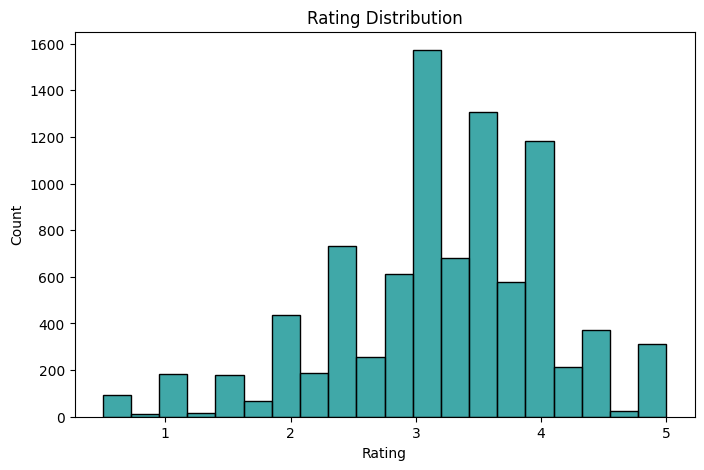

In [45]:
# Distribution of Ratings
print(f"Total ratings: {len(df)}")
print(df['rating'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=False, color='darkcyan')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Users: 270896, mean ratings per user: 96.07


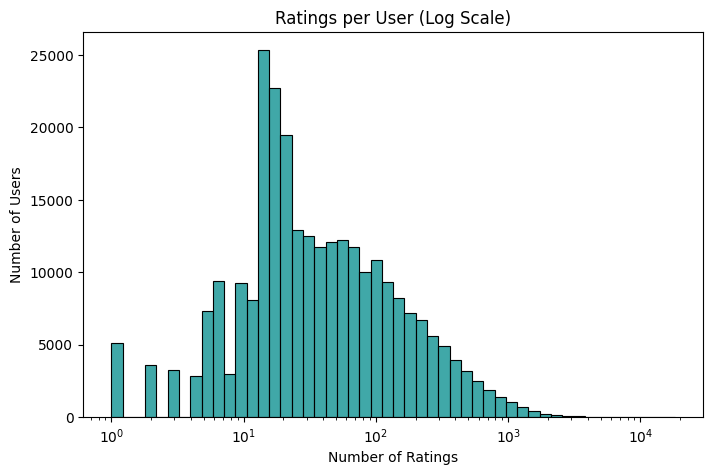

Movies: 45115, mean ratings per movie: 576.84


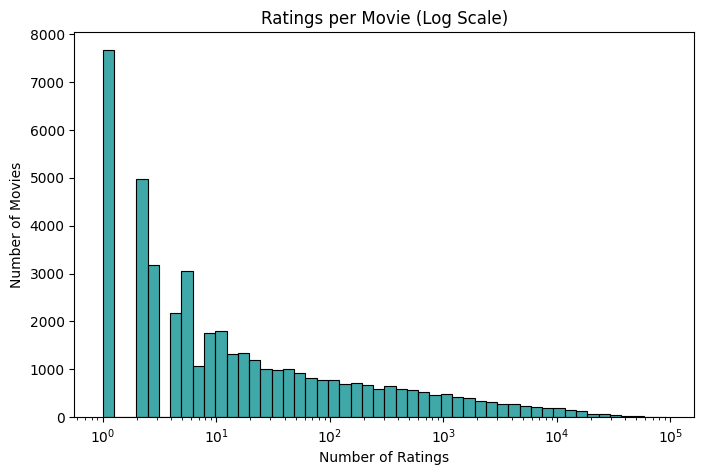

In [46]:
# Long-Tail of Users and Movies

# Ratings per user
user_counts = ratings.groupby('userId').size()
print(f"Users: {user_counts.count()}, mean ratings per user: {user_counts.mean():.2f}")

plt.figure(figsize=(8,5))
sns.histplot(user_counts, bins=50, log_scale=(True, False), color='darkcyan')
plt.title("Ratings per User (Log Scale)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

# Ratings per movie
movie_counts = ratings.groupby('movieId').size()
print(f"Movies: {movie_counts.count()}, mean ratings per movie: {movie_counts.mean():.2f}")

plt.figure(figsize=(8,5))
sns.histplot(movie_counts, bins=50, log_scale=(True, False), color='darkcyan')
plt.title("Ratings per Movie (Log Scale)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

Sparsity of user-movie ratings matrix: 0.9979


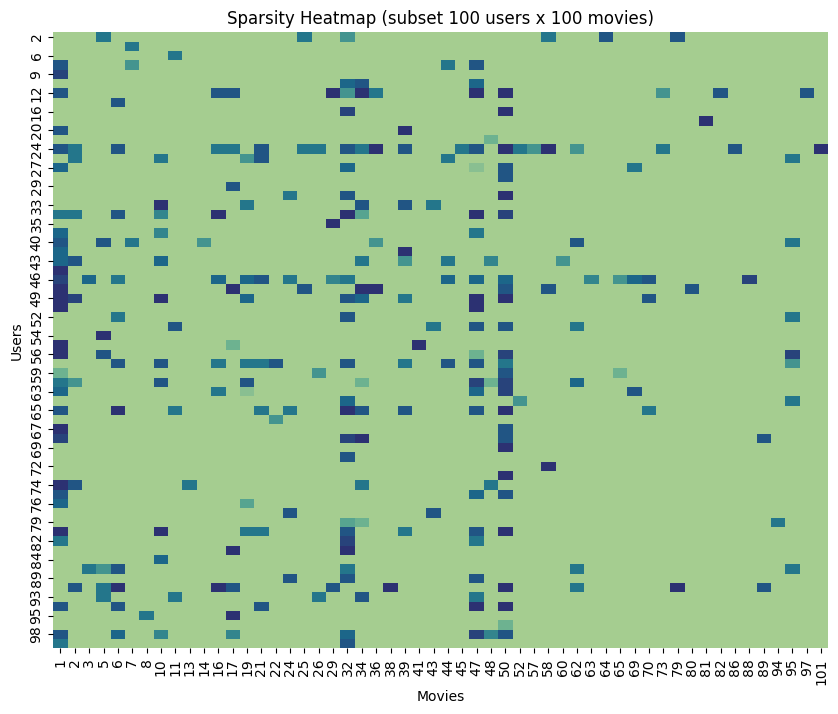

In [47]:
# Sparsity

num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_possible = num_users * num_movies
num_actual = len(ratings)
sparsity = 1 - (num_actual / num_possible)
print(f"Sparsity of user-movie ratings matrix: {sparsity:.4f}")

subset = ratings[(ratings['userId'].isin(user_counts.index[:100])) &
                    (ratings['movieId'].isin(movie_counts.index[:100]))]

pivot = subset.pivot(index='userId', columns='movieId', values='rating').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cbar=False, cmap="crest")
plt.title("Sparsity Heatmap (subset 100 users x 100 movies)")
plt.xlabel("Movies")
plt.ylabel("Users")
plt.show()

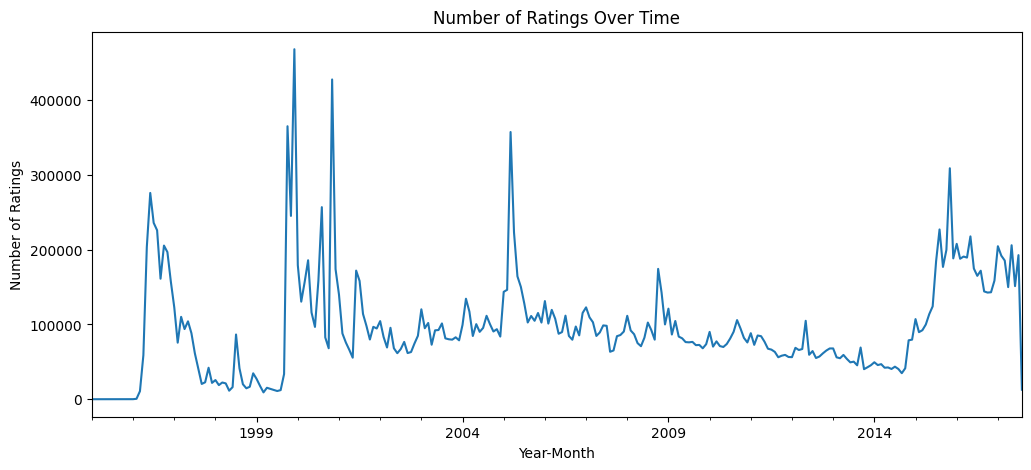

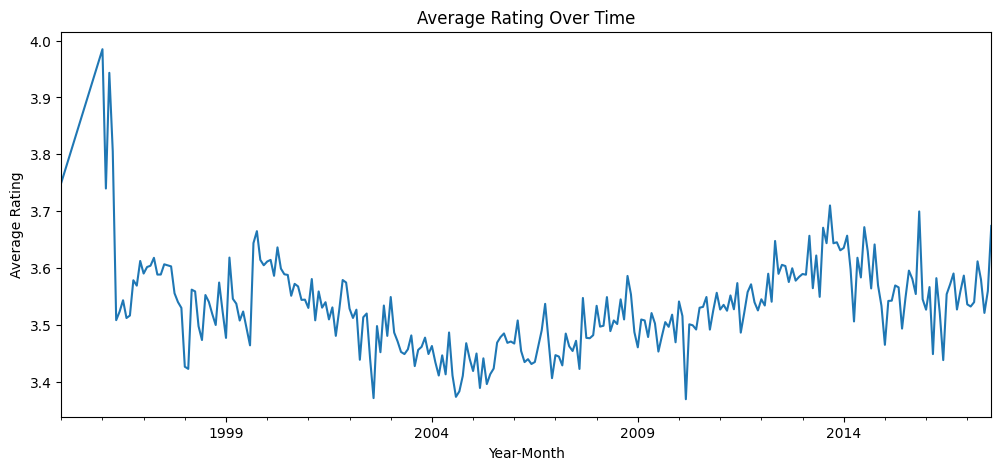

In [48]:
# Temporal Dynamics

ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s') 

ratings['year_month'] = ratings['datetime'].dt.to_period('M')
time_counts = ratings.groupby('year_month').size()

plt.figure(figsize=(12,5))
time_counts.plot()
plt.title("Number of Ratings Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Ratings")
plt.show()

avg_rating_time = ratings.groupby('year_month')['rating'].mean()
plt.figure(figsize=(12,5))
avg_rating_time.plot()
plt.title("Average Rating Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Rating")
plt.show()